# Agrupamiento no conocido: Jerárquico Aglomerativo

### Librerias

In [1]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from scipy.cluster.hierarchy import dendrogram


### Carga de datos


In [2]:
#Carga de datos
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_cuatro_separables_peque.csv'
D = np.array(pd.read_csv(data_file_url,header=0))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,0:2]

### Descripción de los datos cargados

Matriz de datos  [[ 0.0166518 -0.0104376]
 [-0.030516   0.326168 ]
 [-0.0502777 -0.0373395]
 ...
 [-0.409901  -0.158977 ]
 [ 0.180206   0.0364957]
 [-0.442604  -0.200651 ]]


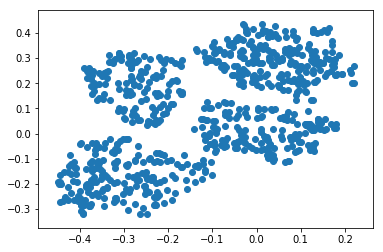

In [3]:
print ('Matriz de datos ', Dx)
plt.scatter(Dx[:,0], Dx[:,1])
plt.show()

### Funciones

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def medida_R_cuadrado(X, Xyp, cXs):   
    cXglob = np.mean(X,axis=0) 
    labels = np.sort(np.unique(Xyp))
    sumTotal = np.sum(np.sum(X-cXglob,1)**2) 
    interior = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])    
    return interior/sumTotal    


def obtener_valor_k():
    rsilueta = np.zeros(9)
    rrsquare = np.zeros(9)
    for k in np.arange(2,11):
        modelo = KMeans(n_clusters=k)
        modelo = modelo.fit(Dx)
        Dyp_sk = modelo.predict(Dx)
        cDx_sk = modelo.cluster_centers_
        rsilueta[k-2] = silhouette_score(Dx, Dyp_sk)
        rrsquare[k-2]  = medida_R_cuadrado(Dx, Dyp_sk, cDx_sk)
        #rrsquare[k-2]  = r2_score(Dy, Dyp_sk)

    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].plot( np.arange(2,11),rsilueta, linestyle='-', marker='o')
    ax[0].set_xlabel("Número de clústeres")
    ax[0].set_ylabel("Medida de ancho de silueta")

    ax[1].plot( np.arange(2,11),rrsquare, linestyle='-', marker='o')
    ax[1].set_xlabel("Número de clústeres")
    ax[1].set_ylabel("Medida de R cuadrado")

    fig.text=''

### Ejecución del algoritmo y resultados

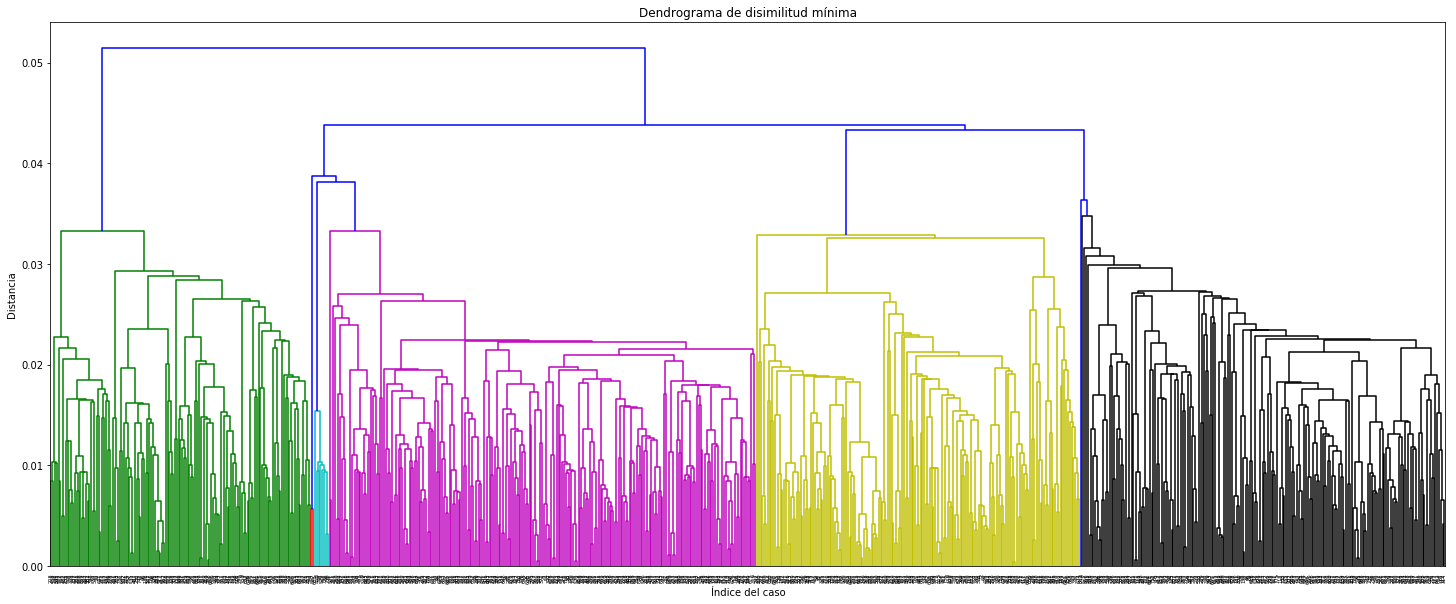

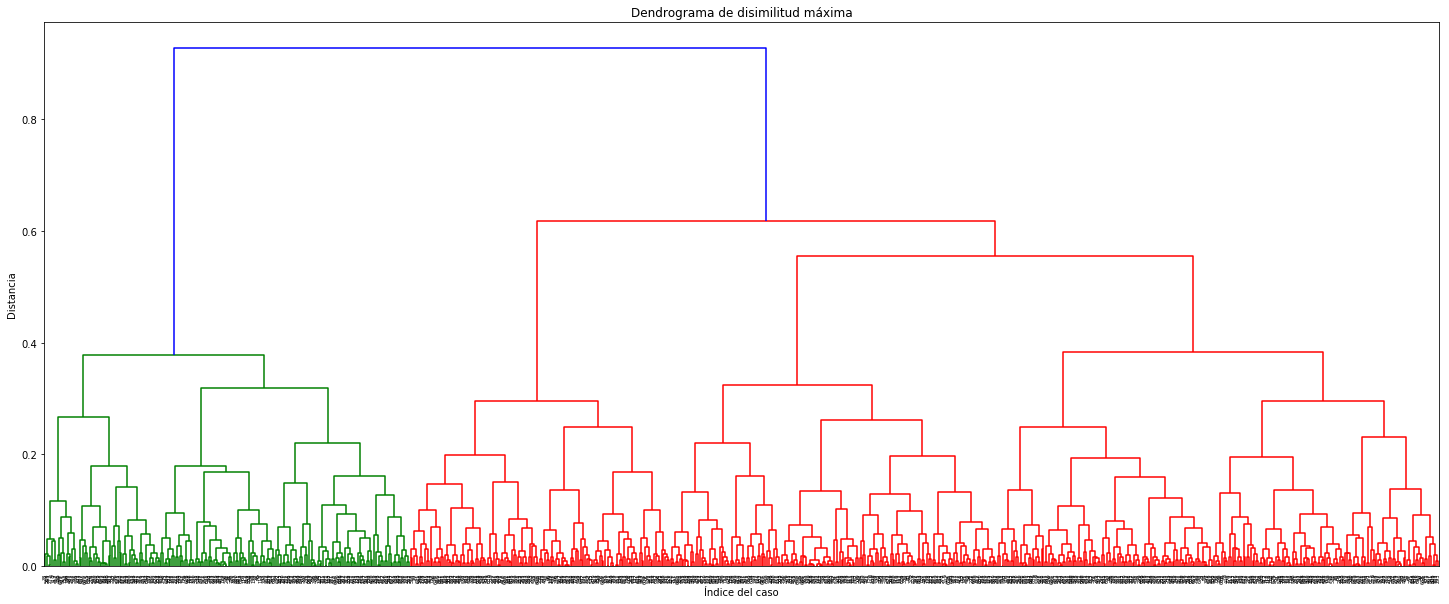

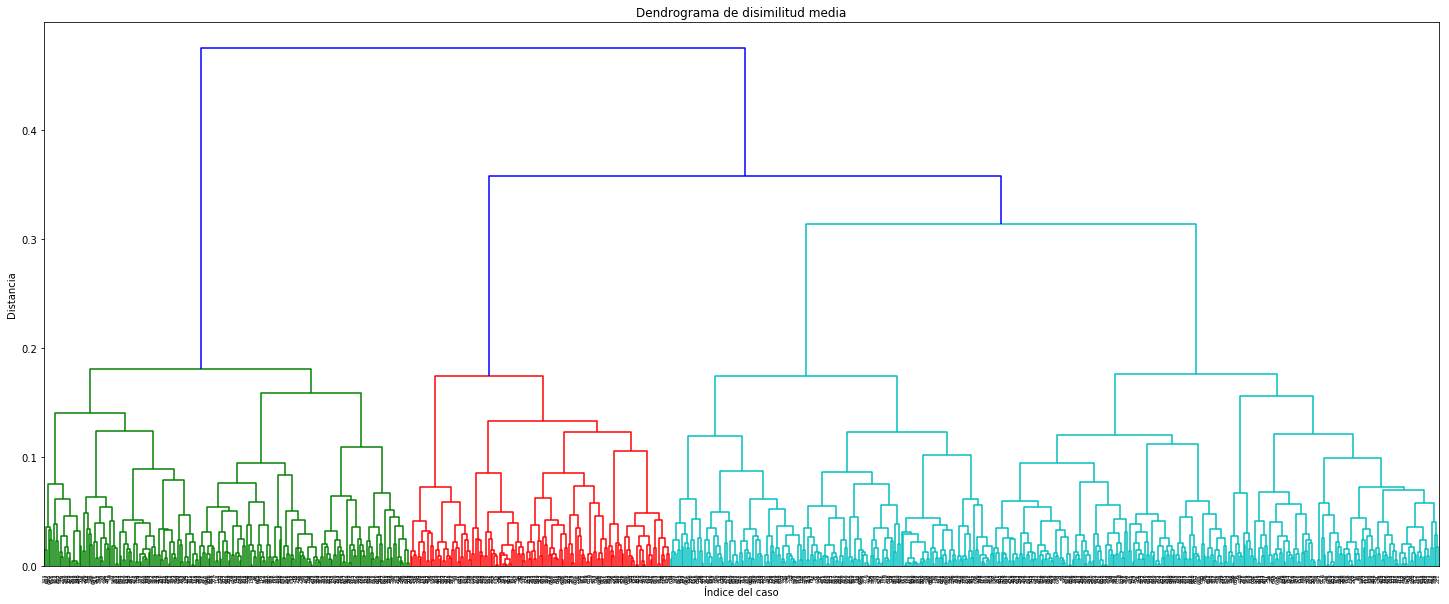

In [5]:
from scipy.cluster.hierarchy import linkage, fcluster, cut_tree

modelo1 = linkage(Dx, 'single')   # disimilitud mínima
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de disimilitud mínima')
plt.xlabel('Índice del caso')
plt.ylabel('Distancia')
dendrogram(modelo1)
plt.show()

modelo2 = linkage(Dx, 'complete') # disimilitud máxima
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de disimilitud máxima')
plt.xlabel('Índice del caso')
plt.ylabel('Distancia')
dendrogram(modelo2)
plt.show()

modelo3 = linkage(Dx, 'average')  # disimilitud media
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de disimilitud media')
plt.xlabel('Índice del caso')
plt.ylabel('Distancia')
dendrogram(modelo3)
plt.show()


### Elegir el valor de k

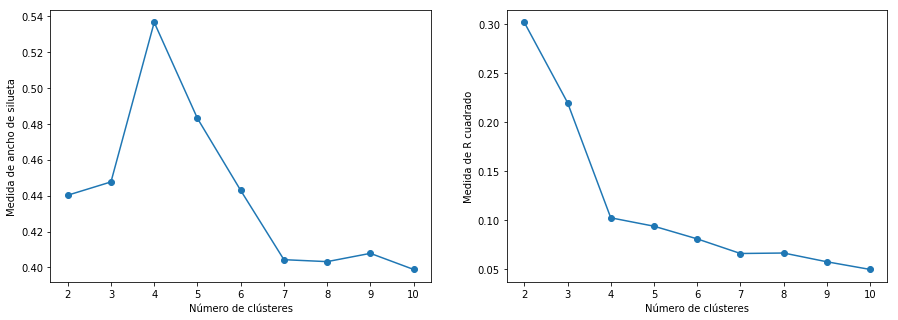

In [6]:
obtener_valor_k()

Se observa que el mejor número de clusters es 4, tanto mediante la medida del ancho de silueta, como con la R cuadrado

In [7]:
K = 4

### Comparativa para distintas disimilitudes


Comparativa para distintas disimilitudes:


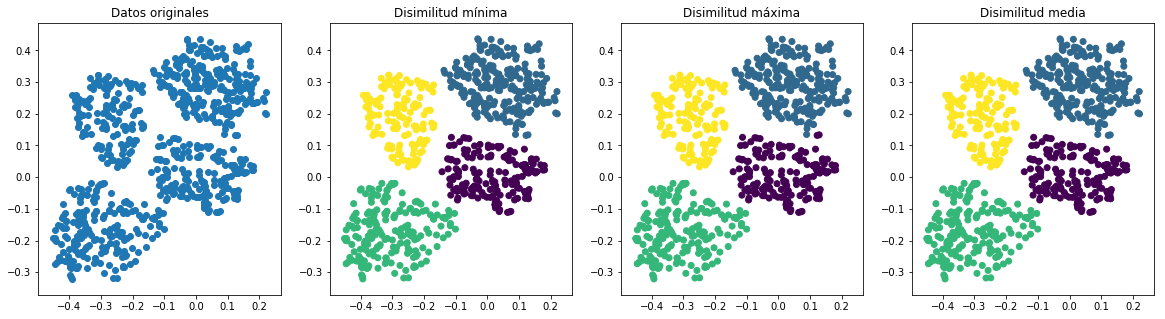

In [8]:
def plot_varios(Dx, K):
    fig, ax = plt.subplots(1, 4, figsize=(20,5))
    ax[0].scatter(Dx[:,0], Dx[:,1])
    ax[0].set_title('Datos originales')
    
    modelo = linkage(Dx, 'single')
    ax[1].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[1].set_title('Disimilitud mínima')
    
    modelo = linkage(Dx, 'complete')
    ax[2].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[2].set_title('Disimilitud máxima')
    
    modelo = linkage(Dx, 'average')
    ax[3].scatter(Dx[:,0], Dx[:,1], c=cut_tree(modelo, n_clusters = K).flatten())
    ax[3].set_title('Disimilitud media')

print()
print('Comparativa para distintas disimilitudes:')
plot_varios(Dx, K)

La disimilitud media y la mínima parecen ser las que más se adecúan a un clustering de 4.

### Métricas intrinsecas

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,calinski_harabaz_score

modeloSingle = AgglomerativeClustering(linkage="single", n_clusters=K)
DySingle=modeloSingle.fit_predict(Dx)

print('La medida de Silueta con K =', K, 'es', silhouette_score(Dx, DySingle))
print('La medida de Calinski Harabaz con K =', K, 'es', calinski_harabaz_score(Dx, DySingle)) 

ValueError: Unknown linkage type single.Valid options are dict_keys(['ward', 'complete', 'average'])